#### Objective of this kernel:
* to further explore the data
* To clean the out put the Dataset to be fed into the various machine algorithms

### Importing our libraries 

In [81]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../output/" directory.
import os
for dirname, _, filenames in os.walk('./output/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

./output/linearmodel.pickle
./output/naive_bayes.pickle
./output/KNNmodel.pickle
./output/processed_data.csv
./output/cleaned_data.csv
./output/Logregmodel.pickle
./output/SVMmodel.pickle
./output/.ipynb_checkpoints/cleaned_data-checkpoint.csv


## Reading the data set

In [2]:
df = pd.read_csv('./output/cleaned_data.csv')
df.head()

,Age,Gender,wassce grade,level,current CGPA,access to a laptop or internet,study group,time spent on independent studies
0,23 - 27 years,Male,16 - 20,L 400,2.9 - 2.5,Yes,Yes,More than 2 hours
1,23 - 27 years,Male,6 - 9,L 400,1.9 - 1.5,Yes,Yes,More than 2 hours
2,23 - 27 years,Male,10 - 15,L 400,3.5 - 3.0,Yes,Yes,Less than 2 hours
3,23 - 27 years,Female,10 - 15,L 400,2.9 - 2.5,Yes,Yes,More than 2 hours
4,23 - 27 years,Female,10 - 15,L 400,2.9 - 2.5,Yes,Yes,More than 2 hours


## we are going to transform all our categorical data to proper format to be fed to our machine learning algorithms
* We preprocess our data with the LabelEncoder from sklearn

#### Preprocessing our independent variable x and our dependent variable y

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
#preprocessing x
Age=label_encoder_x.fit_transform(list(df["Age"]))
Gender=label_encoder_x.fit_transform(list(df["Gender"]))
wassce_grade=label_encoder_x.fit_transform(list(df["wassce grade"]))
level=label_encoder_x.fit_transform(list(df["level"]))
access_to_a_laptop_or_internet=label_encoder_x.fit_transform(list(df["access to a laptop or internet"]))
study_group=label_encoder_x.fit_transform(list(df["study group"]))
time_spent_on_independent_studies=label_encoder_x.fit_transform(list(df["time spent on independent studies"]))

current_CGPA=label_encoder_x.fit_transform(list(df["current CGPA"]))


x=list(zip(Age,Gender,wassce_grade,access_to_a_laptop_or_internet,study_group,time_spent_on_independent_studies,))
y=list(current_CGPA)

# Lets start implementing our machine learning algorithms

### Fitting the training data

In [4]:
from sklearn.model_selection import train_test_split
import pickle
# we split our data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
from sklearn.preprocessing import StandardScaler # to scale our data 
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Impleamenting the linear regression algorithm


In [241]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
best = 0
for _ in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
    #Create a Gaussian Classifier
    bayes_model = GaussianNB()
    # Train the model using the training sets
    bayes_model.fit(x_train,y_train)
    bayes_score =bayes_model.score(x_test,y_test)
    if bayes_score > best:
        best = bayes_score
        with open("./output/naive_bayes.pickle","wb") as f:
            pickle.dump(bayes_model,f)
print(best)

0.5


In [242]:
#Predict Output
y_pred= bayes_model.predict(x_test)
print ("Predicted Value:", y_pred)

Predicted Value: [3 0 4 0 3 3 4 3 3 0 2 0 3 2 2 3 2 2 3 3 2 2 0 4]


## Model Evaluation using Confusion Matrix

In [243]:
import warnings
warnings.filterwarnings('ignore') 
# import the metrics class
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("\nConfusion Matrix of naive_bayes:\n")
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy of naive_bayes: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("\nClassification Report of naive_bayes:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix of naive_bayes:

Accuracy of naive_bayes: 50.0%

Classification Report of naive_bayes:

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.00      0.00      0.00         3
           2       0.43      0.50      0.46         6
           3       0.78      0.78      0.78         9
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         1

    accuracy                           0.50        24
   macro avg       0.29      0.35      0.31        24
weighted avg       0.45      0.50      0.47        24



#### Visualizing Confusion Matrix using Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

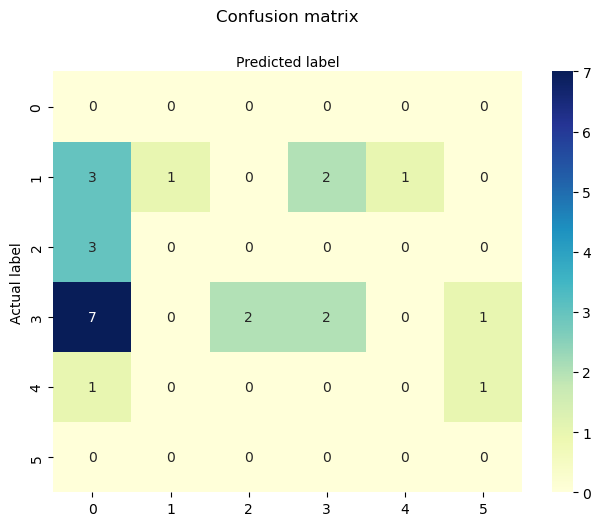

In [82]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#### loading Svm model so we dont have to rerun our algorithm 

In [84]:
pickle_in = open("./output/naive_bayes.pickle","rb")
linear = pickle.load(pickle_in)